In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Pandasdata\\DT_files\\loan_prediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# There were few outliers in the data

In [6]:
# Let us remove the loan ID as it doesnt have any influence here

In [7]:
df.drop('Loan_ID',axis=1,inplace=True)

In [8]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
for cols in df.columns:
    if df[cols].dtypes =='object':
        print("Column Name is {} and  no of Unique values are {}".format(cols, len(df[cols].value_counts())))
        print()

Column Name is Gender and  no of Unique values are 2

Column Name is Married and  no of Unique values are 2

Column Name is Dependents and  no of Unique values are 4

Column Name is Education and  no of Unique values are 2

Column Name is Self_Employed and  no of Unique values are 2

Column Name is Property_Area and  no of Unique values are 3

Column Name is Loan_Status and  no of Unique values are 2



In [10]:
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

Male      489
Female    112
Name: Gender, dtype: int64

Yes    398
No     213
Name: Married, dtype: int64

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

No     500
Yes     82
Name: Self_Employed, dtype: int64

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Y    422
N    192
Name: Loan_Status, dtype: int64



In [11]:
# Filling the missing values with Mode

In [12]:
df['Gender'].mode()

0    Male
dtype: object

In [13]:
df['Gender']=df['Gender'].fillna('Male')

In [14]:
df['Married'].mode()

0    Yes
dtype: object

In [15]:
df['Married']=df['Married'].fillna('Yes')

In [16]:
df['Dependents'].mode()

0    0
dtype: object

In [17]:
df['Dependents']=df['Dependents'].fillna('0')

In [18]:
df['Self_Employed'].mode()

0    No
dtype: object

In [19]:
df['Self_Employed']=df['Self_Employed'].fillna('No')

In [20]:
df['LoanAmount'].mode()

0    120.0
dtype: float64

In [21]:
df['LoanAmount']=df['LoanAmount'].fillna(120)

In [22]:
df['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [23]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(360.0)

In [24]:
df['Credit_History'].mode()

0    1.0
dtype: float64

In [25]:
df['Credit_History']=df['Credit_History'].fillna(1.0)

In [26]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
categorical=df.select_dtypes(include=['object']).keys()
categorical

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [28]:
numerical=df.select_dtypes(include=['int64','float64']).keys()
numerical

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

### Plotting Categorical Data

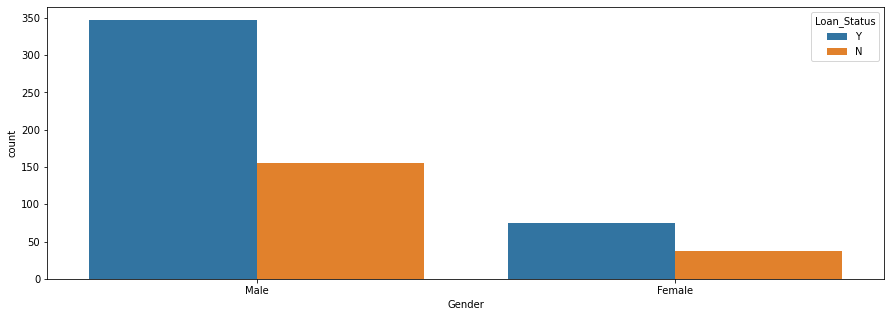

In [29]:
plt.figure(figsize=(15,5))
sns.countplot('Gender', hue='Loan_Status',data=df)

In [30]:
# More acceptance rate in both male and female

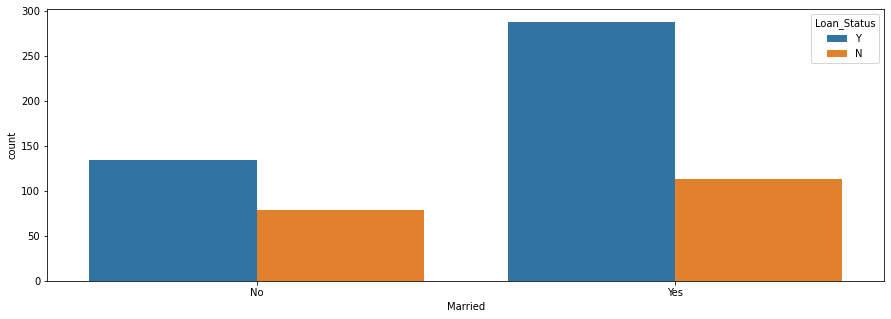

In [31]:
plt.figure(figsize=(15,5))
sns.countplot('Married', hue='Loan_Status',data=df)

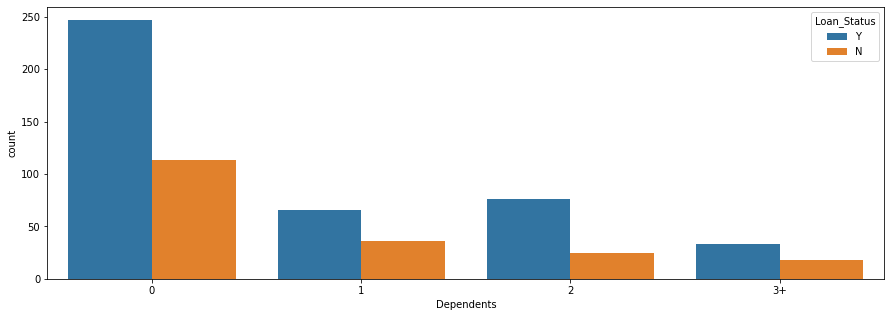

In [32]:
plt.figure(figsize=(15,5))
sns.countplot('Dependents', hue='Loan_Status',data=df)

In [33]:
# If there are no dependants, Loan can be given easily

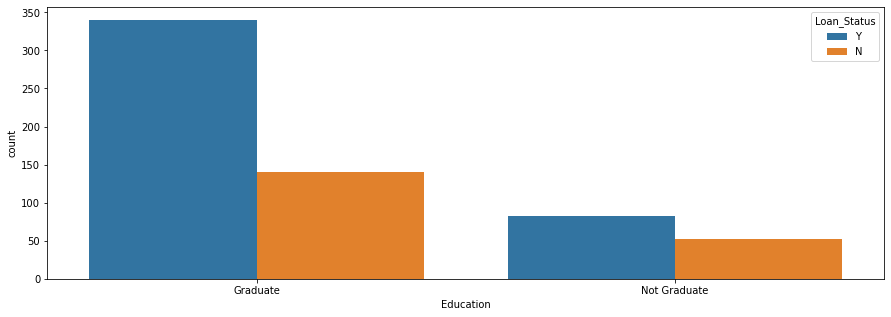

In [34]:
plt.figure(figsize=(15,5))
sns.countplot('Education', hue='Loan_Status',data=df)

In [35]:
# Graduate gets loan easily

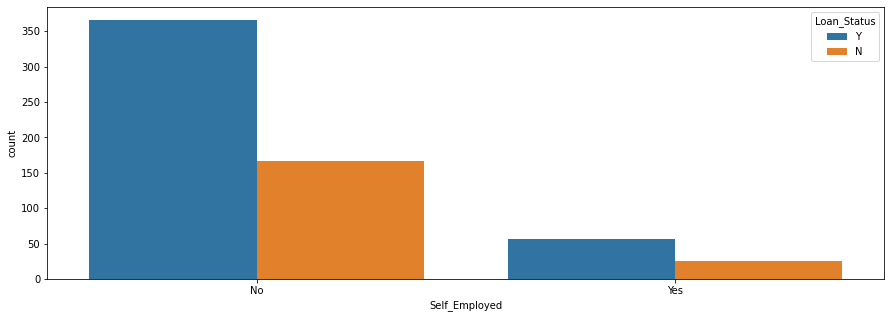

In [36]:
plt.figure(figsize=(15,5))
sns.countplot('Self_Employed', hue='Loan_Status',data=df)

In [37]:
# Rate of loan approval is high for a non self-employed as there is low uncertainity in continuous stream of income

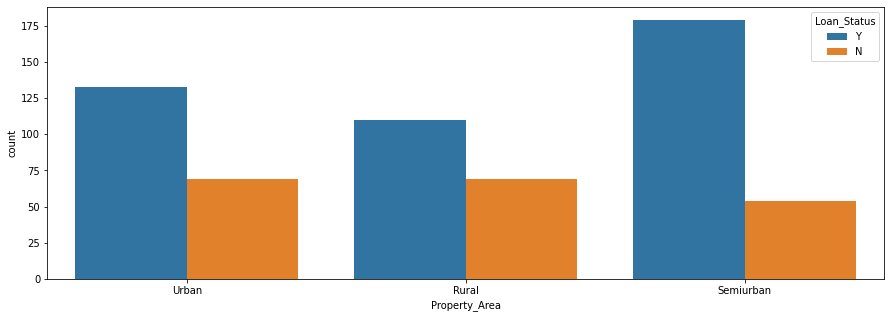

In [38]:
plt.figure(figsize=(15,5))
sns.countplot('Property_Area', hue='Loan_Status',data=df)

In [39]:
# Semi Urban and Urban approval rate is high than Rural

In [40]:
def conv_loan_status(x):
    if x=='Y':
        return 1
    if x=='N':
        return 0

In [41]:
df['Loan_Status']=df['Loan_Status'].apply(conv_loan_status)

In [42]:
df['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

### Plotting Numerical Data

In [43]:
numerical

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

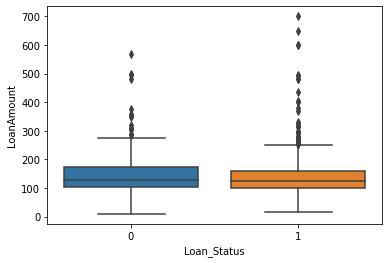

In [44]:
sns.boxplot(y="LoanAmount",x="Loan_Status",data=df)

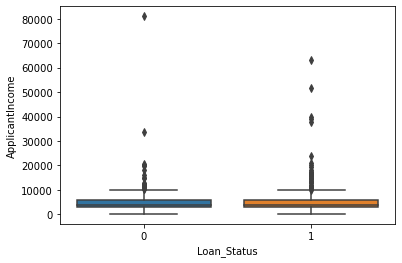

In [45]:
sns.boxplot(y="ApplicantIncome",x="Loan_Status",data=df)

In [46]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [47]:
df['Dependents']=df['Dependents'].replace('3+',3)

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.loc[:,['Gender','Married','Education','Self_Employed','Property_Area']]=df.loc[:,['Gender','Married','Education','Self_Employed','Property_Area']].apply(le.fit_transform)

In [49]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [50]:
df_corr=df.corr()

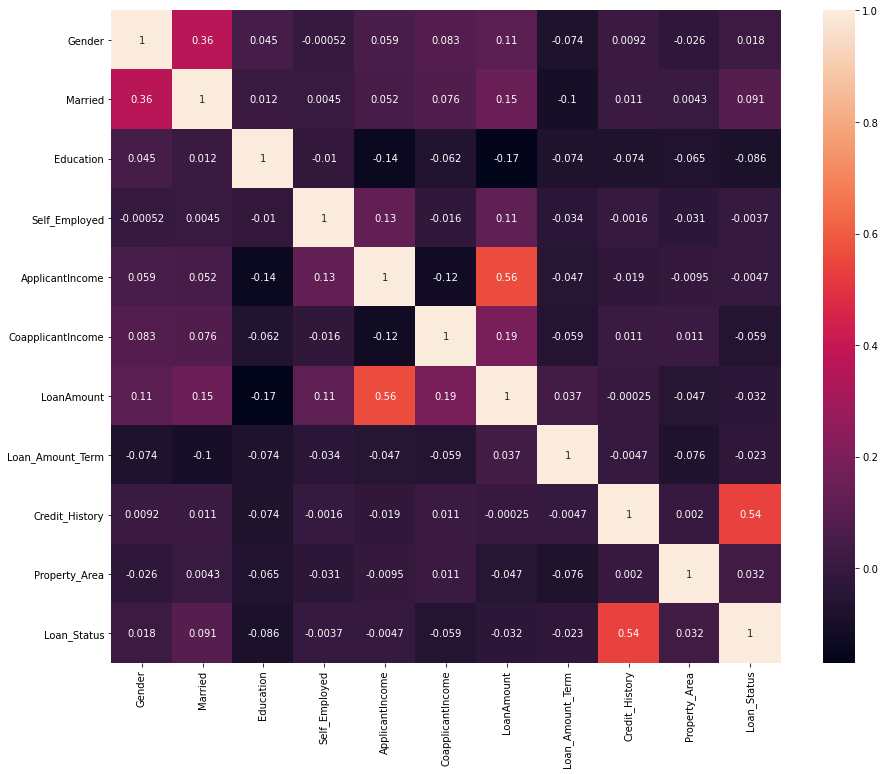

In [51]:
plt.figure(figsize=(15,12))
sns.heatmap(df_corr,annot=True)

In [52]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [53]:
print(x.shape)
print(y.shape)

(614, 11)
(614,)


In [54]:
x.dtypes

Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
dtype: object

In [55]:
x.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [56]:
x['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [57]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
x=ss.fit_transform(x)

In [58]:
x

array([[ 0.47234264, -1.37208932, -0.73780632, ...,  0.2732313 ,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.2732313 ,
         0.41173269, -1.31851281],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.2732313 ,
         0.41173269,  1.22329839],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.2732313 ,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.2732313 ,
         0.41173269,  1.22329839],
       [-2.11710719, -1.37208932, -0.73780632, ...,  0.2732313 ,
        -2.42876026, -0.04760721]])

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score
def max_auc_roc_score(algo,x,y):
    max_auc_roc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        algo.fit(x_train,y_train)
        y_pred = algo.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_auc_roc_score:
            max_auc_roc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_auc_roc_score)
    print("Accuracy is=",accuracy_score(y_test,y_pred))
    print("F1 Score= ",f1_score(y_test,y_pred))
    return final_r_state

### Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
lg_algo = LogisticRegression()
max_auc_roc_score(lg_algo,x,y)

auc roc score corresponding to  42  is  0.7030523255813954
auc roc score corresponding to  43  is  0.7119195046439628
auc roc score corresponding to  44  is  0.7178914835164836
auc roc score corresponding to  45  is  0.6888888888888889
auc roc score corresponding to  46  is  0.7240581625908791
auc roc score corresponding to  47  is  0.6968887492143305
auc roc score corresponding to  48  is  0.6158076681332495
auc roc score corresponding to  49  is  0.6943181818181818
auc roc score corresponding to  50  is  0.7084302325581395
auc roc score corresponding to  51  is  0.7222222222222222
auc roc score corresponding to  52  is  0.7316849816849818
auc roc score corresponding to  53  is  0.7044042913608131
auc roc score corresponding to  54  is  0.7228896103896105
auc roc score corresponding to  55  is  0.6456804065499717
auc roc score corresponding to  56  is  0.6838709677419355
auc roc score corresponding to  57  is  0.7023809523809523
auc roc score corresponding to  58  is  0.71199633699633

63

In [61]:
from sklearn.model_selection import cross_val_score
cross_val_score(lg_algo,x,y,cv=5,scoring="roc_auc").mean()

0.7242367230292927

### Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt_algo=DecisionTreeClassifier()
max_auc_roc_score(dt_algo,x,y)

auc roc score corresponding to  42  is  0.6799418604651163
auc roc score corresponding to  43  is  0.6880804953560371
auc roc score corresponding to  44  is  0.6447458791208791
auc roc score corresponding to  45  is  0.638888888888889
auc roc score corresponding to  46  is  0.6459021810971579
auc roc score corresponding to  47  is  0.6945317410433689
auc roc score corresponding to  48  is  0.5961659333752357
auc roc score corresponding to  49  is  0.660551948051948
auc roc score corresponding to  50  is  0.7049418604651164
auc roc score corresponding to  51  is  0.6245210727969349
auc roc score corresponding to  52  is  0.6767399267399268
auc roc score corresponding to  53  is  0.704686617730096
auc roc score corresponding to  54  is  0.6693181818181818
auc roc score corresponding to  55  is  0.6070016939582157
auc roc score corresponding to  56  is  0.6263440860215054
auc roc score corresponding to  57  is  0.6565255731922399
auc roc score corresponding to  58  is  0.6433150183150182


89

In [63]:
cross_val_score(dt_algo,x,y,cv=5,scoring="roc_auc").mean()

0.6668913233309517

### Random Forest 

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500],'criterion' : ("gini", "entropy")}
rf=RandomForestClassifier()
gsv = GridSearchCV(rf, parameters, cv=5,scoring="roc_auc")
gsv.fit(x,y)
gsv.best_params_

{'criterion': 'gini', 'n_estimators': 100}

In [65]:
rf_algo =RandomForestClassifier(n_estimators=500,criterion='gini')
max_auc_roc_score(rf_algo,x,y)

auc roc score corresponding to  42  is  0.6905523255813952
auc roc score corresponding to  43  is  0.6825077399380803
auc roc score corresponding to  44  is  0.7115384615384616
auc roc score corresponding to  45  is  0.6935897435897436
auc roc score corresponding to  46  is  0.7015862524785195
auc roc score corresponding to  47  is  0.7006599622878692
auc roc score corresponding to  48  is  0.6176932746700189
auc roc score corresponding to  49  is  0.6915584415584416
auc roc score corresponding to  50  is  0.7013081395348837
auc roc score corresponding to  51  is  0.7442528735632183
auc roc score corresponding to  52  is  0.7206959706959707
auc roc score corresponding to  53  is  0.7087803500846979
auc roc score corresponding to  54  is  0.7116883116883117
auc roc score corresponding to  55  is  0.6305759457933371
auc roc score corresponding to  56  is  0.6682795698924732
auc roc score corresponding to  57  is  0.7134038800705467
auc roc score corresponding to  58  is  0.70604395604395

69

In [66]:
cross_val_score(rf_algo,x,y,cv=5,scoring="roc_auc").mean()

0.7703183108601065

### KNN 

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
gsv = GridSearchCV(knn, neighbors, cv=5,scoring="roc_auc")
gsv.fit(x,y)
gsv.best_params_

{'n_neighbors': 25}

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn_algo=KNeighborsClassifier(n_neighbors=25)
max_auc_roc_score(knn_algo,x,y)

auc roc score corresponding to  42  is  0.6976744186046512
auc roc score corresponding to  43  is  0.6987616099071208
auc roc score corresponding to  44  is  0.7022664835164836
auc roc score corresponding to  45  is  0.6777777777777778
auc roc score corresponding to  46  is  0.7002643754130866
auc roc score corresponding to  47  is  0.6698617221873036
auc roc score corresponding to  48  is  0.602294154619736
auc roc score corresponding to  49  is  0.6943181818181818
auc roc score corresponding to  50  is  0.6851744186046512
auc roc score corresponding to  51  is  0.6944444444444444
auc roc score corresponding to  52  is  0.7376373626373627
auc roc score corresponding to  53  is  0.6782891022021457
auc roc score corresponding to  54  is  0.7285714285714286
auc roc score corresponding to  55  is  0.6348108413325805
auc roc score corresponding to  56  is  0.6946236559139785
auc roc score corresponding to  57  is  0.6666666666666667
auc roc score corresponding to  58  is  0.699175824175824

63

### SVC

In [69]:
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
gsv = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
gsv.fit(x,y)
gsv.best_params_

{'C': 0.01, 'kernel': 'rbf'}

In [70]:
svc_algo=SVC(kernel='rbf',C=0.01)
max_auc_roc_score(svc_algo,x,y)

auc roc score corresponding to  42  is  0.5
auc roc score corresponding to  43  is  0.5
auc roc score corresponding to  44  is  0.5
auc roc score corresponding to  45  is  0.5
auc roc score corresponding to  46  is  0.5
auc roc score corresponding to  47  is  0.5
auc roc score corresponding to  48  is  0.5
auc roc score corresponding to  49  is  0.5
auc roc score corresponding to  50  is  0.5
auc roc score corresponding to  51  is  0.5
auc roc score corresponding to  52  is  0.5
auc roc score corresponding to  53  is  0.5
auc roc score corresponding to  54  is  0.5
auc roc score corresponding to  55  is  0.5
auc roc score corresponding to  56  is  0.5
auc roc score corresponding to  57  is  0.5
auc roc score corresponding to  58  is  0.5
auc roc score corresponding to  59  is  0.5
auc roc score corresponding to  60  is  0.5
auc roc score corresponding to  61  is  0.5
auc roc score corresponding to  62  is  0.5
auc roc score corresponding to  63  is  0.5
auc roc score corresponding to  

42

### Bagging

In [71]:
from sklearn.ensemble import BaggingClassifier
bg_algo = BaggingClassifier(max_samples=0.5,max_features=0.5)

In [72]:
max_auc_roc_score(bg_algo,x,y)

auc roc score corresponding to  42  is  0.6136627906976744
auc roc score corresponding to  43  is  0.6136222910216718
auc roc score corresponding to  44  is  0.5113324175824177
auc roc score corresponding to  45  is  0.6235042735042735
auc roc score corresponding to  46  is  0.6721744877726371
auc roc score corresponding to  47  is  0.6503771213073539
auc roc score corresponding to  48  is  0.6176932746700189
auc roc score corresponding to  49  is  0.6402597402597403
auc roc score corresponding to  50  is  0.7013081395348837
auc roc score corresponding to  51  is  0.6853448275862069
auc roc score corresponding to  52  is  0.7234432234432235
auc roc score corresponding to  53  is  0.6631846414455109
auc roc score corresponding to  54  is  0.5693181818181818
auc roc score corresponding to  55  is  0.6002258610954263
auc roc score corresponding to  56  is  0.6086021505376344
auc roc score corresponding to  57  is  0.6710758377425045
auc roc score corresponding to  58  is  0.63782051282051

97

### Gradient Boosting

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gb_algo= GradientBoostingClassifier(n_estimators=200,learning_rate=.02)
max_auc_roc_score(gb_algo,x,y)

auc roc score corresponding to  42  is  0.7021802325581395
auc roc score corresponding to  43  is  0.6928792569659443
auc roc score corresponding to  44  is  0.7225274725274725
auc roc score corresponding to  45  is  0.6824786324786325
auc roc score corresponding to  46  is  0.7184401850627893
auc roc score corresponding to  47  is  0.6852608422375864
auc roc score corresponding to  48  is  0.6099937146448774
auc roc score corresponding to  49  is  0.6886363636363637
auc roc score corresponding to  50  is  0.7021802325581395
auc roc score corresponding to  51  is  0.710727969348659
auc roc score corresponding to  52  is  0.7197802197802198
auc roc score corresponding to  53  is  0.7044042913608131
auc roc score corresponding to  54  is  0.7172077922077922
auc roc score corresponding to  55  is  0.6326933935629588
auc roc score corresponding to  56  is  0.6731182795698925
auc roc score corresponding to  57  is  0.6843033509700176
auc roc score corresponding to  58  is  0.711996336996337

69

### Gaussian Naive Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB
gnb_algo=GaussianNB()
max_auc_roc_score(gnb_algo,x,y)

auc roc score corresponding to  42  is  0.6968023255813953
auc roc score corresponding to  43  is  0.7074303405572755
auc roc score corresponding to  44  is  0.706043956043956
auc roc score corresponding to  45  is  0.7222222222222222
auc roc score corresponding to  46  is  0.7128222075346993
auc roc score corresponding to  47  is  0.7122878692646135
auc roc score corresponding to  48  is  0.6099937146448774
auc roc score corresponding to  49  is  0.6829545454545455
auc roc score corresponding to  50  is  0.6843023255813954
auc roc score corresponding to  51  is  0.7246168582375478
auc roc score corresponding to  52  is  0.7316849816849818
auc roc score corresponding to  53  is  0.7044042913608131
auc roc score corresponding to  54  is  0.7058441558441559
auc roc score corresponding to  55  is  0.6456804065499717
auc roc score corresponding to  56  is  0.7005376344086022
auc roc score corresponding to  57  is  0.7138447971781304
auc roc score corresponding to  58  is  0.718864468864468

63

### Bernouli Naive Bayes

In [75]:
from sklearn.naive_bayes import BernoulliNB
bn_algo=BernoulliNB()
max_auc_roc_score(bn_algo,x,y)

auc roc score corresponding to  42  is  0.7030523255813954
auc roc score corresponding to  43  is  0.7046439628482972
auc roc score corresponding to  44  is  0.707760989010989
auc roc score corresponding to  45  is  0.6888888888888889
auc roc score corresponding to  46  is  0.7093522802379378
auc roc score corresponding to  47  is  0.6968887492143305
auc roc score corresponding to  48  is  0.6158076681332495
auc roc score corresponding to  49  is  0.6943181818181818
auc roc score corresponding to  50  is  0.7084302325581395
auc roc score corresponding to  51  is  0.7222222222222222
auc roc score corresponding to  52  is  0.7316849816849818
auc roc score corresponding to  53  is  0.7044042913608131
auc roc score corresponding to  54  is  0.7228896103896105
auc roc score corresponding to  55  is  0.6456804065499717
auc roc score corresponding to  56  is  0.689247311827957
auc roc score corresponding to  57  is  0.7023809523809523
auc roc score corresponding to  58  is  0.6991758241758241

63

In [77]:
#Bernouli Naive Bayes is giving hig AUC Roc Score, Hence we finalize it

In [78]:
bn=BernoulliNB()
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state =63,test_size=0.20)
bn.fit(x_train,y_train)
y_pred = bn.predict(x_test)
print("auc roc score = ",roc_auc_score(y_test,y_pred))
print("Accuracy is=",accuracy_score(y_test,y_pred))
print("F1 Score= ",f1_score(y_test,y_pred))

auc roc score =  0.7857142857142857
Accuracy is= 0.8780487804878049
F1 Score=  0.9214659685863874


In [79]:
import joblib

In [80]:
joblib.dump(bn,'Loan_prediction_BNB.pkl')

['Loan_prediction_BNB.pkl']